In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

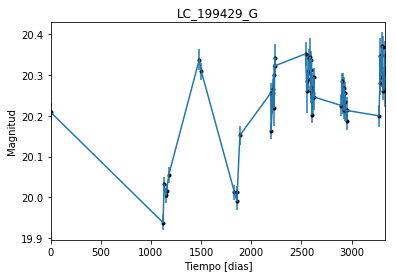

In [2]:
data = np.genfromtxt('LC_199429_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_199429_G')
plt.savefig("LC_199429_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

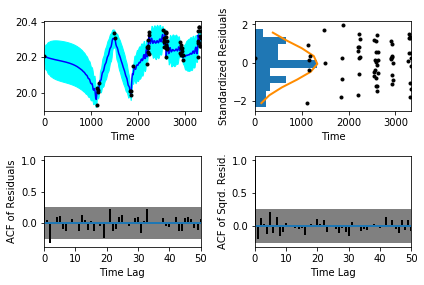

In [5]:
sample.assess_fit()

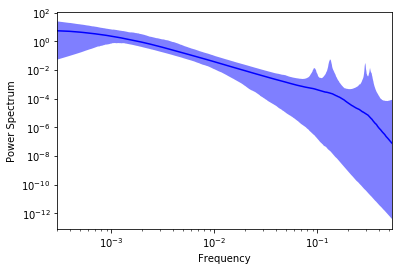

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

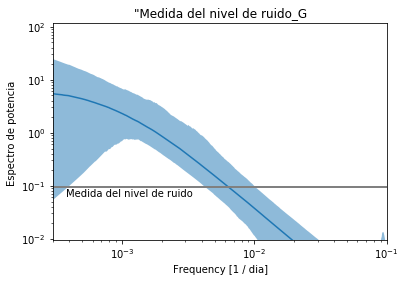

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_199429_G')
plt.title('"Medida del nivel de ruido_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_199429_G')

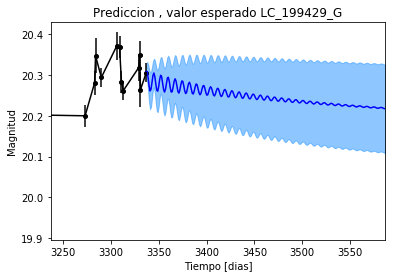

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_199429_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_199429_G')

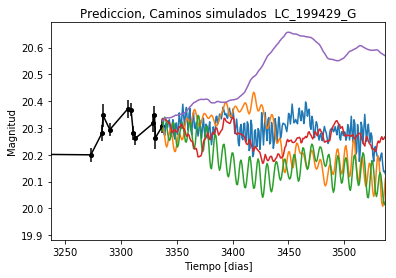

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_199429_G')

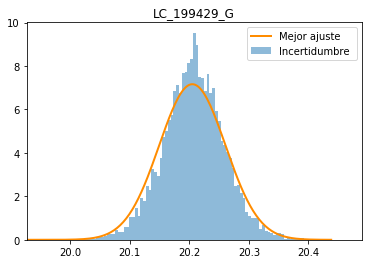

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_199429_G')
plt.savefig("Mejor_ajuste_LC_199429_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_199429_G')

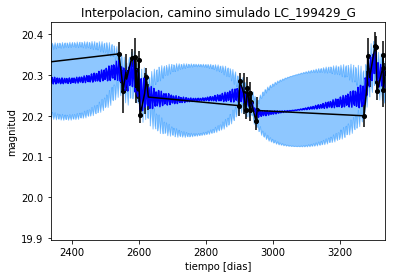

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_199429_G')

Text(0.5,1,'Interpolacion, camino simulado LC_199429_G')

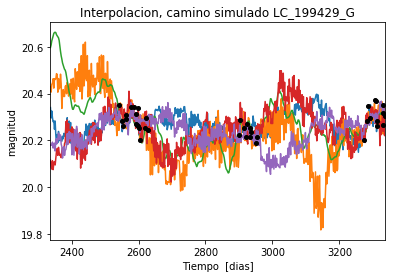

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_199429_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 656.104522169
Median: 0.00528796428791
Standard deviation: 0.128109585428
68% credibility interval: [ 0.00136226  0.03423248]
95% credibility interval: [  3.81487252e-04   4.84092540e-01]
99% credibility interval: [  3.12697005e-04   8.98016422e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 966.755199634
Median: 0.00457596291574
Standard deviation: 0.0768176212309
68% credibility interval: [ 0.00114303  0.02246025]
95% credibility interval: [ 0.00037817  0.20032278]
99% credibility interval: [  3.12697005e-04   6.09225164e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 805.093580608
Median: 0.177223463611
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 221.429330457
Median: 114.295519191
Standard deviation: 2.85962424605
68% credibility interval: [ 110.88032685  116.78562735]
95% credibility interval: [ 107.65733222  118.04855919]
99% credibility interval: [ 105.54339629  118.83171208]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 727.227044438
Median: 1.4169151978
Standard deviation: 2.30472417562
68% credibility interval: [ 0.26132702  4.83123538]
95% credibility interval: [ 0.06081443  7.02769818]
99% credibility interval: [  0.02793276  11.12574667]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1307.62482225
Median: 3.33811137845
Standard deviation: 11.0608653448
68% credibility interval: [  0.69333469  18.23258567]
95% credibility interval: [  0.08376281  

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 16389.9521781
Median: 9.1766263242e-46
Standard deviation: 1.51336872193e+135
68% credibility interval: [  2.19897963e-91   2.94389099e-21]
95% credibility interval: [  1.18068951e-118   7.57156440e+113]
99% credibility interval: [  1.00654258e-127   2.86095782e+130]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 708.49279821
Median: 20.2042642516
Standard deviation: 0.0552252739465
68% credibility interval: [ 20.15502385  20.24987371]
95% credibility interval: [ 20.09005626  20.31711717]
99% credibility interval: [ 20.03302779  20.36399816]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1759.45048057
Median: 0.206729119664
Standard deviation: 0.254195712988
68% credibility interval: [ 0.09546018  0.6616093 ]
95% credibility interval: [ 0.          0.90211771]
99% credibility interval: [ 0.          1.01785694]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1759.45048057
Median: 0.206729119664
Standard deviation: 0.254195712988
68% credibility interval: [ 0.09546018  0.6616093 ]
95% credibility interval: [ 0.          0.90211771]
99% credibility interval: [ 0.          1.01785694]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 360.506570503
Median: 0.0
Standard deviation: 0.000568999918091
68% cred

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 221.429330457
Median: 114.295519191
Standard deviation: 2.85962424605
68% credibility interval: [ 110.88032685  116.78562735]
95% credibility interval: [ 107.65733222  118.04855919]
99% credibility interval: [ 105.54339629  118.83171208]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1154.57677176
Median: 0.0165894685291
Standard deviation: 0.0117804192797
68% credibility interval: [ 0.01091323  0.02749386]
95% credibility interval: [ 0.00803124  0.04830196]
99% credibility interval: [ 0.0063628  0.0673465]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 407.836469284
Median: 1.05875170738
Standard deviation: 0.251082558681
68% credibility interval: [ 0.87104298  1.35115948]
95% credibility interval: [ 0.7305439   1.69891086]
99% credibility interval: [ 0.64419803  1.8923935 ]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 746.400889749
Median: 0.0265172313009
Standard deviation: 0.416875901881
68% credibility interval: [ 0.00072955  0.30061983]
95% credibility interval: [  1.11940451e-115   1.42045166e+000]
99% credibility interval: [  8.05571799e-134   2.69514712e+000]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 656.104522169
Median: (-0.0332252595187-0.376774474837j)
Standard deviation: 1.78852971009
68% credibility interval: [-0.21508900-1.70316043j -0.00855936-1.82000226j]
95% credibility interval: [ -3.04164313e+00+0.j          -2.39695510e-03-0.97618238j]
99% credibility interval: [ -5.64240359e+00+0.j          -1.96473323e-03-5.44733681j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 966.755199634
Median: (-0.0287516229584+0.819604558512j)
Standard deviation: 1.66849518447
68% credibility interval: [-0.14112192+2.2912036j  -0.00718185+0.14331276j]
95% credibility interval: [-1.25866513+1.05108832j -0.00237608+0.8374716j ]
99% credibility interval: [ -3.82787460e+00+0.j          -1.96473323e-03+5.44733681j]
Posterior su